In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
!pip install seaborn

In [3]:
#reading the file
anz_data=pd.read_csv(r'C:\Users\NNAMDI\Documents\anz_transaction.csv')

In [4]:
anz_data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [5]:
anz_data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [6]:
#selecting the columns
anz_data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [7]:
#selecting the necessary columns, with numerical data
anz_data=anz_data[["age","gender","customer_id","txn_description","first_name", "balance","amount"]]

In [8]:
anz_data

,age,gender,customer_id,txn_description,first_name,balance,amount
0,26,F,CUS-2487424745,POS,Diana,35.39,16.25
1,26,F,CUS-2487424745,SALES-POS,Diana,21.20,14.19
2,38,M,CUS-2142601169,POS,Michael,5.71,6.42
3,40,F,CUS-1614226872,SALES-POS,Rhonda,2117.22,40.90
4,26,F,CUS-2487424745,SALES-POS,Diana,17.95,3.25
...,...,...,...,...,...,...,...
12038,30,F,CUS-55310383,POS,Melissa,14054.14,9.79
12039,20,M,CUS-2688605418,SALES-POS,Robert,9137.79,63.87
12040,28,M,CUS-2663907001,POS,Craig,45394.57,43.96
12041,69,M,CUS-1388323263,SALES-POS,Tyler,11350.67,30.77


In [9]:
anz_data.head()

,age,gender,customer_id,txn_description,first_name,balance,amount
0,26,F,CUS-2487424745,POS,Diana,35.39,16.25
1,26,F,CUS-2487424745,SALES-POS,Diana,21.20,14.19
2,38,M,CUS-2142601169,POS,Michael,5.71,6.42
3,40,F,CUS-1614226872,SALES-POS,Rhonda,2117.22,40.90
4,26,F,CUS-2487424745,SALES-POS,Diana,17.95,3.25


In [10]:
#Getting the unique values for the types of transactions
print(anz_data['txn_description'].unique())

['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']


<AxesSubplot:xlabel='txn_description', ylabel='count'>

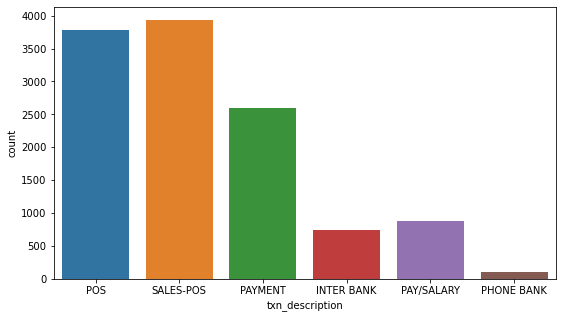

In [11]:

plt.figure(figsize=(9, 5))
sns.countplot(x="txn_description", data=anz_data)

In [12]:
plot_anz_data= anz_data.groupby(["customer_id"]).mean().reset_index()
plot_anz_data.head()

,customer_id,age,balance,amount
0,CUS-1005756958,53.0,2275.852055,222.862603
1,CUS-1117979751,21.0,9829.929000,339.843700
2,CUS-1140341822,28.0,5699.212250,212.632500
3,CUS-1147642491,34.0,9032.841186,245.600169
4,CUS-1196156254,34.0,22272.433755,147.145796


In [13]:
#Finding the Salary for all the customers
salary=anz_data[anz_data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
salary=salary[["customer_id","amount"]]
salary=salary.rename(columns = {'amount':'salary'})

In [14]:
salary.head()

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73


In [15]:
#Merging tables plot_anz_transaction and salary
plot_anz_data=pd.merge(plot_anz_data, salary, on="customer_id")
plot_anz_data.head()

,customer_id,age,balance,amount,salary
0,CUS-1005756958,53.0,2275.852055,222.862603,970.47
1,CUS-1117979751,21.0,9829.929000,339.843700,3578.65
2,CUS-1140341822,28.0,5699.212250,212.632500,1916.51
3,CUS-1147642491,34.0,9032.841186,245.600169,1711.39
4,CUS-1196156254,34.0,22272.433755,147.145796,3903.73


<AxesSubplot:xlabel='age', ylabel='salary'>

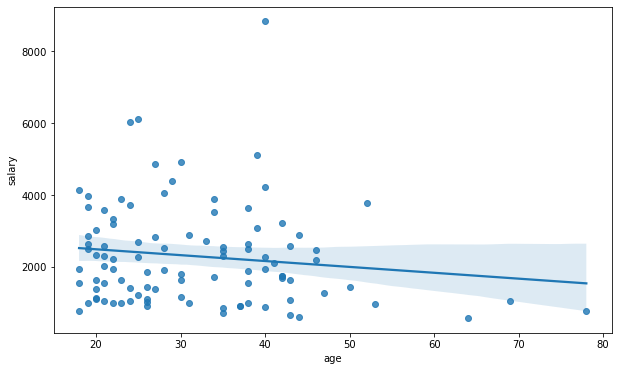

In [46]:
plt.figure(figsize=(10, 6))
sns.regplot(x="age", y= "salary", data=plot_anz_data)

<AxesSubplot:xlabel='balance', ylabel='salary'>

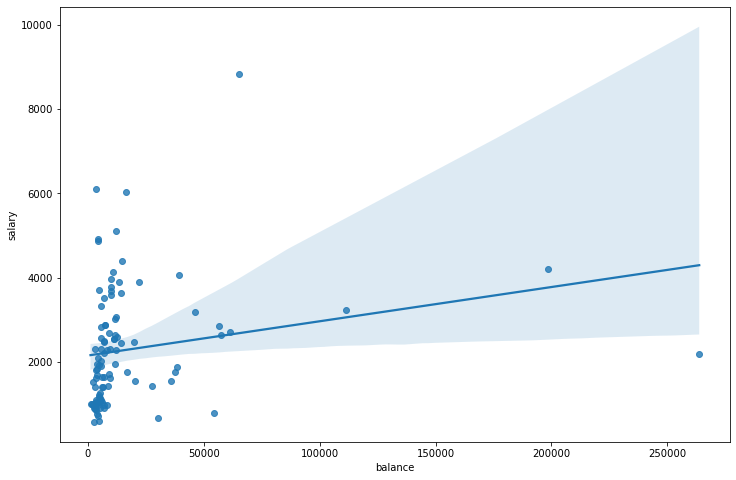

In [17]:
plt.figure(figsize=(12, 8))
sns.regplot(x="balance", y="salary",data=plot_anz_data)

In [18]:
#POS indicates transaction made at any business or such, thus it reflects spending behaviour of customer
pos=anz_data[anz_data["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").mean().reset_index()
pos=pos[["customer_id","amount"]]
pos=pos.rename(columns = {'amount':'pos'})

In [19]:
pos

,customer_id,pos
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432
...,...,...
95,CUS-72755508,25.022143
96,CUS-809013380,22.255098
97,CUS-860700529,28.164845
98,CUS-880898248,20.101429


In [20]:
#Bills and payments made by customer
payment=anz_data[anz_data["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
payment=payment[["customer_id","amount"]]
payment=payment.rename(columns = {'amount':'payment'})

In [21]:
payment

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000
...,...,...
95,CUS-72755508,1180.000000
96,CUS-809013380,70.136364
97,CUS-860700529,41.933333
98,CUS-880898248,77.500000


In [22]:
#Bills and payments made by customer
interbank=anz_data[anz_data["txn_description"]=="INTER BANK"].groupby("customer_id").mean().reset_index()
interbank=interbank[["customer_id","amount"]]
interbank=interbank.rename(columns = {'amount':'interbank'})

In [23]:
interbank

,customer_id,interbank
0,CUS-1117979751,1001.000000
1,CUS-1140341822,90.000000
2,CUS-1147642491,125.000000
3,CUS-1196156254,153.400000
4,CUS-1271030853,76.187500
...,...,...
63,CUS-51506836,252.933333
64,CUS-527400765,61.133333
65,CUS-55310383,155.000000
66,CUS-809013380,1383.000000


In [24]:

phonebank=anz_data[anz_data["txn_description"]=="PHONE BANK"].groupby("customer_id").mean().reset_index()
phonebank=phonebank[["customer_id","amount"]]
phonebank=phonebank.rename(columns = {'amount':'phonebank'})

In [25]:
phonebank

,customer_id,phonebank
0,CUS-1005756958,182.00
1,CUS-1646183815,150.00
2,CUS-1896554896,1916.00
3,CUS-2155701614,82.00
4,CUS-2348881191,1629.00
5,CUS-2376382098,177.00
6,CUS-261674136,43.00
7,CUS-3151318058,36.00
8,CUS-3180318393,67.00
9,CUS-326006476,158.00


In [26]:
len(phonebank)

16

In [27]:
#Combining all relevant data into a single data frame
customer=anz_data.groupby("customer_id").mean().reset_index()
customer=customer[["customer_id","age","balance"]]
df=pd.merge(customer, payment, on="customer_id")
df=pd.merge(df, pos, on="customer_id")
df=pd.merge(df, salary, on="customer_id")

In [28]:
df

,customer_id,age,balance,payment,pos,salary
0,CUS-1005756958,53.0,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21.0,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28.0,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34.0,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34.0,22272.433755,43.100000,31.157432,3903.73
...,...,...,...,...,...,...
95,CUS-72755508,35.0,4497.557069,1180.000000,25.022143,725.32
96,CUS-809013380,21.0,3756.902903,70.136364,22.255098,1037.07
97,CUS-860700529,30.0,3462.276009,41.933333,28.164845,1808.62
98,CUS-880898248,26.0,8528.830385,77.500000,20.101429,1433.98


<AxesSubplot:xlabel='payment', ylabel='salary'>

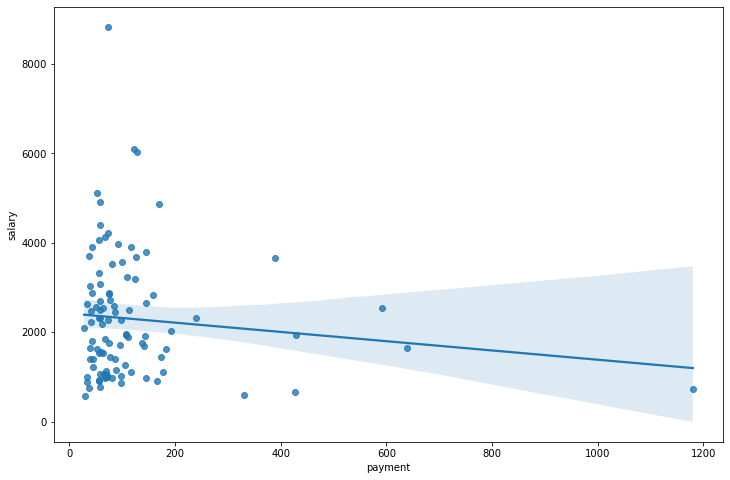

In [29]:
#Salary vs Payments
plt.figure(figsize=(12, 8))
sns.regplot(x="payment",y= "salary", fit_reg=True, data=df)

<AxesSubplot:xlabel='pos', ylabel='salary'>

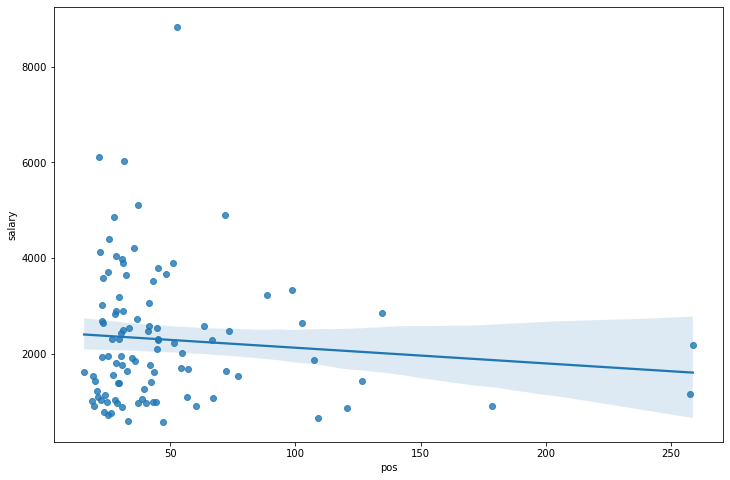

In [30]:
#Salary vs Pos
plt.figure(figsize=(12, 8))
sns.regplot(x="pos",y= "salary", fit_reg=True, data=df)

In [31]:
#Predicting the Salary:
#Linear regression model
#Defining the X and y of machine learning
X=df[["age","balance","payment","pos"]].values
y=df["salary"].values

In [32]:
#Train,Test splitting
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [33]:
#Linear Regression model
lr = LinearRegression()

In [34]:
#Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
#Prediction using 
y_pred=lr.predict(X_test)

In [36]:
#r2 score
print('Coefficient of determination: ', r2_score(y_test, y_pred))

Coefficient of determination:  0.07666219584715872


In [37]:
#Here we make a sample prediction
#age=50
#balance=5000
#payment=100
#pos=50
#age in years and financial values in Australian Dollar

In [48]:
print("The model predicts salary will be=")
print(lr.predict([[50,5000,100,50]])[0])

The model predicts salary will be=
1694.8999714893384


In [ ]:
#Here we make a sample prediction
#age=60
#balance=5000
#payment=100
#pos=50
#age in years and financial values in Australian Dollar

In [49]:
print("The model predicts salary will be=")
print(lr.predict([[60,5000,100,50]])[0])

The model predicts salary will be=
1467.1295983855503


In [39]:
#decision tree regressor 
dtr = DecisionTreeRegressor()

In [40]:
#fitting the model
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
#prediction of  test values
dtr.predict(X_test)

array([1043.12, 2854.74, 3517.61, 2218.73, 3071.14, 3649.51, 6107.23,
       1002.13, 1757.81, 1272.47,  576.  , 2500.  , 3026.95, 2854.74,
       3676.94, 2443.24, 2320.3 , 3676.94, 4910.9 , 3517.61])

In [42]:
#Here we make a sample prediction
#age=50
#balance=5000
#payment=100
#pos=50
#age in years and financial values in Australian Dollar

In [50]:
print("The model predicts salary will be=")
print(dtr.predict([[50,5000,100,50]])[0])

The model predicts salary will be=
1272.47


In [51]:
print("The model predicts salary will be=")
print(dtr.predict([[60,4000,70,40]])[0])

The model predicts salary will be=
1043.12
